# Model Evaluation

## Evaluation on the Testing dataset

Jeg indlæser først testing datasættet, som findes i mappen ``Data``, sammen med alle andre datasæt. Desuden ændre jeg kolonnernes navne til hhv. *X* og *Y*, for lættere brug.

In [2]:
import pandas as pd

Test_Data = pd.read_csv('../Data/Testing_dataset.csv', usecols=['type', 'cleaned content'])

Test_Data = pd.DataFrame({'X':Test_Data['cleaned content'], 'Y':Test_Data['type']})

Test_Data

,X,Y
0,"['casav', 'pipe', 'organ', 'instal', 'saint', ...",reliable
1,"['mike', 'barrett', '<URL>', '<DATE>', 'despit...",fake
2,"['financi', '|', 'thu', '<DATE>', '|', '<NUM>'...",reliable
3,"['miami', 'dolphin', 'time', 'worri', 'dion', ...",fake
4,"['<NUM>', 'thing', 'need', 'know', 'european',...",reliable
...,...,...
71626,"['apparel', 'accessori', '|', 'mon', '<DATE>',...",reliable
71627,"['return', 'yellow', 'peril', 'kevin', 'willia...",reliable
71628,"['cnn', 'anchor', 'kate', 'bolduan', 'left', '...",fake
71629,"['report', 'use', 'forc', 'necessari', 'congre...",fake


### Loading the models

Her bruger jeg koden fra ``Advanced Model development.ipynb`` til at indlæse den simple logistiske regressionsmodel fra *Part 2* og den avancerede model fra *Part 3*. Dette bliver gjort med ``joblib`` biblioteket.

Først indlæser jeg den simple model.

In [5]:
import joblib

# reading the vectorizer and model
Simple_vectorizer  = joblib.load('../Advanced model/Simple_vectorizer.pkl')
Simple_model       = joblib.load('../Advanced model/Simple_model.pkl')

Herefter indlæser jeg den avancerede model.

In [6]:
import joblib

# reading the vectorizer, feature selector and model
Advanced_vectorizer  = joblib.load('../Advanced model/Advanced_vectorizer.pkl')
Advanced_selector    = joblib.load('../Advanced model/Advanced_selector.pkl')
Advanced_model       = joblib.load('../Advanced model/Advanced_model.pkl')

### Model evaluation

Nedenfor tester jeg først den simple model på testing sættet, hvorefter jeg printer F1-score for modellens evne til at klassificere Fake og Reliable klasserne. Til at udregne F1-score bruger jeg ``sklearn`` biblioteket.

Nedenfor ses F1-score for den simple model.

In [34]:
from sklearn.metrics import classification_report

# Testing the model
predictions = Simple_model.predict(Simple_vectorizer.transform(Test_Data['X']))
result = classification_report(Test_Data['Y'], predictions, output_dict=True)
print(f'Fake     : {result['fake']['f1-score']}')
print(f'Reliable : {result['reliable']['f1-score']}')

Fake     : 0.8448543860163651
Reliable : 0.8590611179197527


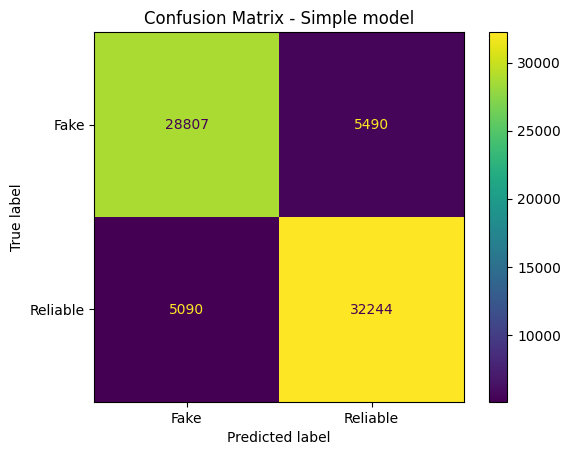

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plot

# calculation confusion values
cm = confusion_matrix(Test_Data['Y'], predictions)

# Visualiser confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Reliable'])
disp.plot() 
plot.title("Confusion Matrix - Simple model")
plot.show()

Nedenfor ses F1-score for den avancerede model.

In [36]:
from sklearn.metrics import classification_report

# Testing the model
predictions = Advanced_model.predict(Advanced_selector.transform(Advanced_vectorizer.transform(Test_Data['X'])))
result = classification_report(Test_Data['Y'], predictions, output_dict=True)
print(f'Fake     : {result['fake']['f1-score']}')
print(f'Reliable : {result['reliable']['f1-score']}')

Fake     : 0.8942449295014799
Reliable : 0.9028776496739378


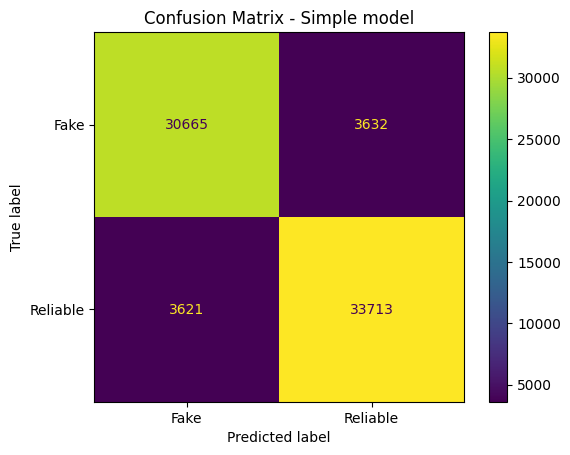

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plot

# calculation confusion values
cm = confusion_matrix(Test_Data['Y'], predictions)

# Visualiser confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Reliable'])
disp.plot() 
plot.title("Confusion Matrix - Simple model")
plot.show()

## Evaluation on the LIAR dataset

### Reading the dataset

Først indlæser jeg datasættet for at få overblik over datasættet og eventuelle problemmer der kunne forekomme i arbejdet med det.

Da det ikke er meningen at vi skal træne modeller på LIAR datasættet har jeg valgt at bruge ``train.tsv`` istedet for ``test.tsv``, da denne indeholder mange flere entries og vil derfor være mere repræsentativt for hele LIAR datasættet. Ideelt ville de 3 datasæt kombineres, men dette burde også være fint.

In [87]:
import pandas as pd

filePath = '../Data/LIAR dataset/train.tsv'

LIAR_Data = pd.read_csv(filePath, sep='\t',header=None)

LIAR_Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,5473.json,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report"""
10236,3408.json,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview
10237,3959.json,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate
10238,2253.json,false,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...


### Cleaning the dataset

Her bruger jeg en modificeret version af koden fra ``Pre-Processing Program.py``, til at cleane LIAR datasættet på samme måde som ``995,000_rows.csv`` blev cleanet.

In [88]:
# For parallization
import ray
# For data handling
import pandas as pd
from pandas import DataFrame
import numpy as np
# For text cleaning
import cleantext as clean
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

try:
    english_stopwords = set(stopwords.words('english'))
except:
    import nltk
    nltk.download('stopwords')
    english_stopwords = set(stopwords.words('english'))


################# PROGRAM SPECIFICATIONS #################

UNCLEANED_DATASET_PATH = filePath # Has to be a .csv
'''The relative (to the program) or absolute filepath to the csv to be cleaned.'''

COLUMNS_TO_BE_CLEANED = [2]
'''A list of (text) columns in the csv that will be cleaned.'''

DROP_NAN_VALUES = [2]
'''A list of the columns were rows with NaN in these columns, will be removed.'''

CLEANED_FILE_DESTINATION = '../Data/'

################# USER INITIALIZATION #################

MODE = 'f'

################# DEFINING CLEANING FUNCTIONS #################
print('Compiling cleaning functions...')

# Converting to lowercase
def lowercase(text:str):
    return text.lower()

url_regex = re.compile(r'(?:http[s]?://)?(?:www\.)?[\w]+\.[a-z]{2,}[\w#-_]*')
# Replacing URLs
def sub_URL(text:str):
    return url_regex.sub(' <URL> ', text)

email_regex = re.compile(r'[\w._-]+@[\w._-]+\.[a-z]{2,}')
# Replacing Emails
def sub_EMAIL(text:str):
    return email_regex.sub(' <EMAIL> ', text)

date1_regex = re.compile(r'(?:\b\d{1,4}[-/\.]\d{1,2}[-/\.]\d{1,4}\b)') # matcher 20-02-2025 og 20/02/2025 og 20.02.2025 og 2-20-2025 og 2/20/2025 og 2025-02-20 og 20/2/25 2/20/25
date2_regex = re.compile(r'(?:(?:(?:the )?(?:[123]\d|\d)(?:st|nd|rd|th)? (?:of )?)?(?:jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|sep|dec|mon|tue|wed|thu|fri|sat|sun)[a-z]*\.?(?: (?:the )?\d{1,4}(?:st|nd|rd|th)?,?))(?: (?:20|19)[\d]{2}s?\b)?')
date3_regex = re.compile(r'(?:(?:(?:the )?(?:[123]\d|\d)(?:st|nd|rd|th)? of )(?:jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|sep|dec|mon|tue|wed|thu|fri|sat|sun)[a-z]*)')
date4_regex = re.compile(r'(?:20|19)[\d]{2}s?\b')
# Replacing Dates
def sub_DATE(text:str):
    return date4_regex.sub(' <DATE> ', date3_regex.sub(' <DATE> ', date2_regex.sub(' <DATE> ', date1_regex.sub(' <DATE> ', text))))

num_regex = re.compile(r'\d(?:\d|\.|\,|st|nd|rd|th)*')
# Replacing Numbers
def sub_NUM(text:str):
    return num_regex.sub(' <NUM> ', text)

punct_regex = re.compile(r'[^\w\s](?=[a-z])')
# Replacing Punctuation in words
def sub_punct(text:str):
    return punct_regex.sub(' ', text)

# rep URL, rep Email, rep tlf.nr., rep Numbers, del punct, rep Valuta
def cleaning_module(text:str):
    return clean.normalize_whitespace(clean.remove_punct(clean.replace_currency_symbols(text)))

# Cleaning function containing the above functions.
def CleanText(text:str) -> str :
    """Returns a cleaned string.
    
    Args:
        text (str) : A (raw) uncleaned text (document).
    Returns:
        str : The same text, but cleaned."""

    return cleaning_module(
        sub_punct(
            sub_NUM(
                sub_DATE(
                    sub_EMAIL(
                        sub_URL(
                            lowercase(
                                text
                            )
                        )
                    )
                )
            )
        )
    )

################# READING FILE #################

# Reading file
print(f"Reading '{UNCLEANED_DATASET_PATH}'...")
if MODE == 'm':
    raise RuntimeError
else:
    news_corpus_FULL = pd.read_csv(UNCLEANED_DATASET_PATH, sep='\t',header=None).dropna(subset=DROP_NAN_VALUES)
    news_corpus = news_corpus_FULL[[0]+COLUMNS_TO_BE_CLEANED]

################# PREPARING PARALLIZATION #################

print('Preparing parallization...')
ray.shutdown()
ray.init()

# initializes a stemmer and defines pipeline
stemmer = PorterStemmer()
def preprocessing_pipeline(text:str):
    return [stemmer.stem(word, to_lowercase=0) for word in CleanText(text).split() if word not in english_stopwords]

@ray.remote
def apply_parallel(df_chunk:DataFrame):
    for column in COLUMNS_TO_BE_CLEANED:
        df_chunk['cleaned '+str(column)] = df_chunk[column].apply(preprocessing_pipeline)
    print(f'Finished cleaning +1/{num_of_chunks}...')
    return df_chunk

# splitting the dataset for parallization.
num_of_chunks = 24
csv_parts = np.array_split(news_corpus, num_of_chunks)

################# PARALLEL CLEANING #################

print('Cleaning in progress...')
results = ray.get([apply_parallel.remote(split) for split in csv_parts])

################# POST PROCESSING AND FINISH #################

# combining the result
print('Combining results...')
news_corpus = pd.concat(results, ignore_index=True).drop(columns=COLUMNS_TO_BE_CLEANED)

print('Writing to file...')
if MODE == 'm':
    raise RuntimeError
else:
    news_corpus_FULL = news_corpus_FULL.merge(news_corpus, on=0)
    news_corpus_FULL.to_csv(CLEANED_FILE_DESTINATION+'cleaned_LIAR.csv', index=False)

print('Done!')

Compiling cleaning functions...
Reading '../Data/LIAR dataset/train.tsv'...
Preparing parallization...


2025-03-22 16:59:40,436	INFO worker.py:1841 -- Started a local Ray instance.
C:\Users\andyk\AppData\Roaming\Python\Python312\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Cleaning in progress...


(pid=29496) Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


(apply_parallel pid=29496) Finished cleaning +1/24...
Combining results...
Writing to file...
Done!


### Preparing the dataset

Her indlæser jeg det cleanede dataset. Det ses at klasserne stadig mangler at blive katagoriseret ind i *Fake* og *Reliable*, hvilket jeg derfor også vil gøre.

In [27]:
import pandas as pd

LIAR_Data = pd.read_csv('../Data/cleaned_LIAR.csv', usecols=['1', 'cleaned 2'])

LIAR_Data = pd.DataFrame({'X':LIAR_Data['cleaned 2'], 'Y':LIAR_Data['1']})

LIAR_Data

,X,Y
0,"['say', 'anni', 'list', 'polit', 'group', 'sup...",false
1,"['declin', 'coal', 'start', 'start', 'natur', ...",half-true
2,"['hillari', 'clinton', 'agre', 'john', 'mccain...",mostly-true
3,"['health', 'care', 'reform', 'legisl', 'like',...",false
4,"['econom', 'turnaround', 'start', 'end', 'term']",half-true
...,...,...
10235,"['larger', 'number', 'shark', 'attack', 'flori...",mostly-true
10236,"['democrat', 'becom', 'parti', 'atlanta', 'met...",mostly-true
10237,"['say', 'altern', 'social', 'secur', 'oper', '...",half-true
10238,"['lift', 'u', 'cuban', 'embargo', 'allow', 'tr...",false


Nedenfor ses hvilke typer der forekommer i LIAR datasættet, og jeg har også rangeret dem i rækkefølge fra mest reliable (venstre) til mest fake (højre). Da vores modeller kun er trænet til at klassificere 2 klasser, *fake* og *reliable* skal disse typer klassificeres under disse 2 klasser.

| true | mostly-true | half-true | barely-true | false | pants-fire |
|-|-|-|-|-|-|

De typer som jeg vurdere til uden tvivl at tilhøre ***Fake***, er *barely-true*, *false* og *pants-fire*. Typerne *false* og *pants-fire* er selvforklarende i hvorfor de tilhøre denne klassen, men *barely-true* har jeg valgt da dette tyder på en betydelig/stærk fordrejning af sandheden.

De typer som jeg vurdere til uden tvivl at tilhøre ***Reliable***, er *true* og *mostly-true*, hvor typen *true* er selvforklarende til at tilhøre denne klasse, men jeg har valgt at *mostly-true* skal tilhøre denne klasse, fordi at dette tyder på et der er meget få eller ubetydelige fejl i fakta, og tæt nok på sandheden.

Derudover har jeg også valgt at *half-true* skal tilhøre ***Reliable***, og det har jeg delvist valgt fordi at det føltes naturligt at splitte typerne på midten, men også fordi at denne ligger i gråzonen mellem sand og falsk. Da jeg mangler en mere dybdegående defination af hvad de forskellige typer betyder og inkludere er det svært at sige om denne tilhøre den ene eller den anden eller om egentlig burde fjernes, men jeg har valgt at denne skal klassificeres som *reliable* da en halv sandhed på være overvejende sand.

Dermed fås grupperne:
- **Fake**:
    - pants-fire
    - false
    - barely-true
- **Reliable**:
    - true
    - mostly-true
    - half-true

Nedenfor omdanner jeg ovenstående typer til de 2 klasser.

In [ ]:
# creating classes
LIAR_Data['Y'] = LIAR_Data['Y'].replace({'pants-fire':'fake', 'false':'fake', 'barely-true':'fake'})
LIAR_Data['Y'] = LIAR_Data['Y'].replace({'true':'reliable', 'mostly-true':'reliable', 'half-true':'reliable'})

LIAR_Data

,X,Y
0,"['say', 'anni', 'list', 'polit', 'group', 'sup...",fake
1,"['declin', 'coal', 'start', 'start', 'natur', ...",reliable
2,"['hillari', 'clinton', 'agre', 'john', 'mccain...",reliable
3,"['health', 'care', 'reform', 'legisl', 'like',...",fake
4,"['econom', 'turnaround', 'start', 'end', 'term']",reliable
...,...,...
10235,"['larger', 'number', 'shark', 'attack', 'flori...",reliable
10236,"['democrat', 'becom', 'parti', 'atlanta', 'met...",reliable
10237,"['say', 'altern', 'social', 'secur', 'oper', '...",reliable
10238,"['lift', 'u', 'cuban', 'embargo', 'allow', 'tr...",fake


### Model evaluation

In [30]:
from sklearn.metrics import classification_report

# Testing the model
predictions = Simple_model.predict(Simple_vectorizer.transform(LIAR_Data['X']))
result = classification_report(LIAR_Data['Y'], predictions, output_dict=True)
print(f'Fake     : {result['fake']['f1-score']}')
print(f'Reliable : {result['reliable']['f1-score']}')

Fake     : 0.4448445564758132
Reliable : 0.6193102312947568


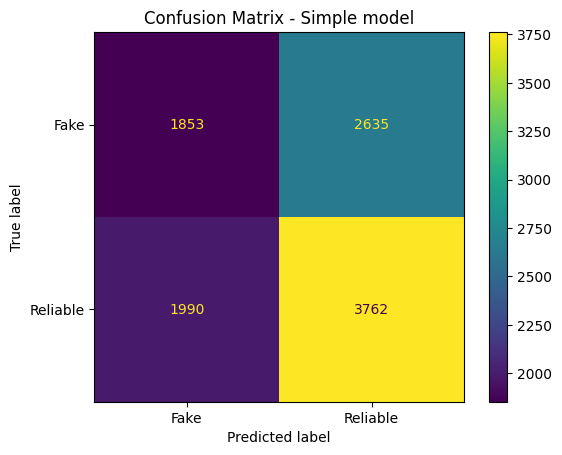

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plot

# calculation confusion values
cm = confusion_matrix(LIAR_Data['Y'], predictions)

# Visualiser confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Reliable'])
disp.plot() 
plot.title("Confusion Matrix - Simple model")
plot.show()

Nedenfor ses F1-score for den avancerede model.

In [33]:
from sklearn.metrics import classification_report

# Testing the model
predictions = Advanced_model.predict(Advanced_selector.transform(Advanced_vectorizer.transform(LIAR_Data['X'])))
result = classification_report(LIAR_Data['Y'], predictions, output_dict=True)
print(f'Fake     : {result['fake']['f1-score']}')
print(f'Reliable : {result['reliable']['f1-score']}')

Fake     : 0.47027565592826304
Reliable : 0.5819865466934568


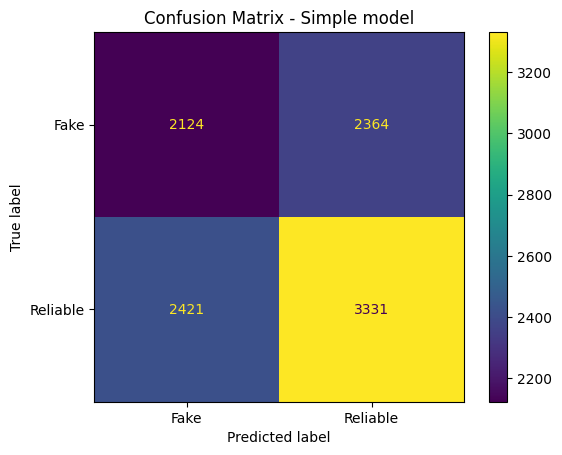

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plot

# calculation confusion values
cm = confusion_matrix(LIAR_Data['Y'], predictions)

# Visualiser confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Reliable'])
disp.plot() 
plot.title("Confusion Matrix - Simple model")
plot.show()

## Comparison

Nedenfor ses en tabel med den Simple- og Advanced models F1-score for *fake* klassen. Altså vises modellernes evne til at klassificere Fake-news. Tabellen viser modellernes F1-score for FakeNews datasettet, altså det datasæt som modellerne blev trænet på, og LIAR datasettet, som modellerne ikke er blevet trænet på og forinden denne vurdering, aldrig var blevet testet på.

| Model      | FakeNews dataset | LIAR dataset |
|------------|:-------------:|:---------------:|
| Simple model   | 84,485 | 44,484 |
| Advanced model | 89,424 | 47,028 |

I tabellen og i confusion matrixerne ses det at begge modeller er betydeligt værre til at vurdere hvad der er fake-news og hvad der ikke er. Dog ses stadig at den avancerede model er en smule bedre end den simple, hvilket kunne tyde på at den avancerede model ikke er bedre end den simple fordi den er overfitted til FakeNews datasettet, men det er svært at sige ved så lave F1-scores.
Ud fra confusion matrixerne for FakeNews datasettet ser det ud til at både den simple og avancerede model laver lige mange False-positives som False-negatives, altså har begge modeller fundet en separation boundary således at de laver lige mange fejl i begge klasser. 

Ud fra confusion matrixerne i LIAR datasættet, ser det derimod ud til at for den simple model så er den mest villig til at klassificere datapunkter som *reliable* end fake, da den laver betydelig flere False-negatives og True-negatives end modsat. For den avancerede model, ser den konsekvent mere forvirret ud, idet at den klassificere cirka lige mange False-positives som False-negatives, som begge klassificeres i betydeligt højere grad end True-positives. Dog ses ligeledes her at modellen er bedst til True-negatives.